In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import src.data.utils as utils
import src.data.data_treatment as dt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#Load the dataset. If you want a raw dataset add the parameter cleaned = false (it is true by default)
df = utils.load_dataset(0)

Loaded dataset: \cleaned_data\additional_data_cleaned.parquet


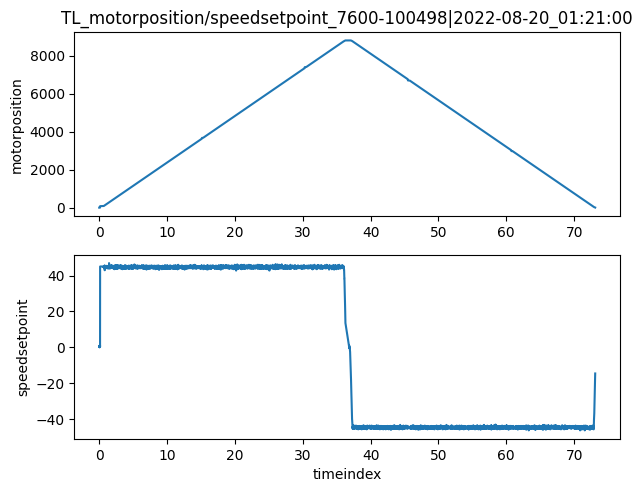

NameError: name 'df_subset' is not defined

In [8]:
#PLOTTING

y_axis_options = ['motorposition', 'speedsetpoint', 'torqueactual', 'torquefeedforward']

# Filter the dataset to find the id you want to plot
df_subset1 = df
robots = df_subset1['robot'].unique()
robot = robots[1]
df_subset1 = df_subset1[df_subset1['robot'] == robot]
ids = df_subset1['id'].unique()
id = ids[230]
series_type = 'TL'
utils.plot_graph(df_subset1, id, series_type, y_axis_options[0], y_axis_options[1])

df_subset2 = df
robots = df_subset2['robot'].unique()
robot = robots[0]
df_subset2 = df_subset2[df_subset2['robot'] == robot]
ids = df_subset2['id'].unique()
id = ids[230]


#Plot the graph(s)
utils.plot_graph(df_subset, id, series_type, y_axis_options[0])



In [5]:
dt.print_series_per_robot(df)

NameError: name 'df' is not defined

In [4]:
dt.print_robots_per_type(df)

['7600' '6640' '6700']
id
7600    3
Name: robot, dtype: int64
id
6640    52
Name: robot, dtype: int64
id
6700    5
Name: robot, dtype: int64


In [33]:
# df = df.where(df['robot_type'] == 'TL')
robots = df['robot'].unique()
robot = robots[1]
df_subset1 = df.where(df['robot'] == robot).dropna()
robot_ids = df_subset1['id'].unique()
robot_id = robot_ids[0]
df_subset1 = df_subset1.where(df_subset1['id'] == robot_id).dropna()
sampling_rate = 0
for i in range(len(df_subset1['timeindex'])-1):
    sampling_rate += df_subset1['timeindex'].iloc[i+1] - df_subset1['timeindex'].iloc[i]
sampling_rate = sampling_rate / (len(df_subset1['timeindex'])-1)
print(sampling_rate)

0.009392292870905587


In [44]:
df_subset = df
robots = df['robot'].unique()
robot = robots[0]
df_subset = df_subset.where(df_subset['robot']==robot).dropna()
ids = df_subset['id'].unique()
df_subset = df_subset[['torqueactual', 'id']]
seen = set()
for i in range(len(ids)):
    if ids[i] in seen:
        continue
    print(i)
    subset1 = df_subset.where(df_subset['id']==ids[i]).dropna()
    for j in range(i+1, len(ids)):
        subset2 = df_subset.where(df_subset['id']==ids[j]).dropna()
        if subset1['torqueactual'].equals(subset2['torqueactual']):
            seen.add(ids[j])
print(len(seen))

0
1
2
3
4
5
6
7
8
9
10
11
12


KeyboardInterrupt: 

In [56]:
df = df.sort_values(by=['id', 'timeindex'])

# Step 2: Group by sequence_id and aggregate torque values as a tuple
grouped = df.groupby('id')['torqueactual'].apply(tuple)

# Step 3: Find unique sequences
unique_sequences = grouped.unique()

# Output the number of unique sequences
num_unique_sequences = unique_sequences.size

print("Number of unique sequences:", num_unique_sequences)

Number of unique sequences: 256
